In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr,spearmanr
import pingouin as pg# 偏相关分析
from my_style import set_journal_style

set_journal_style()

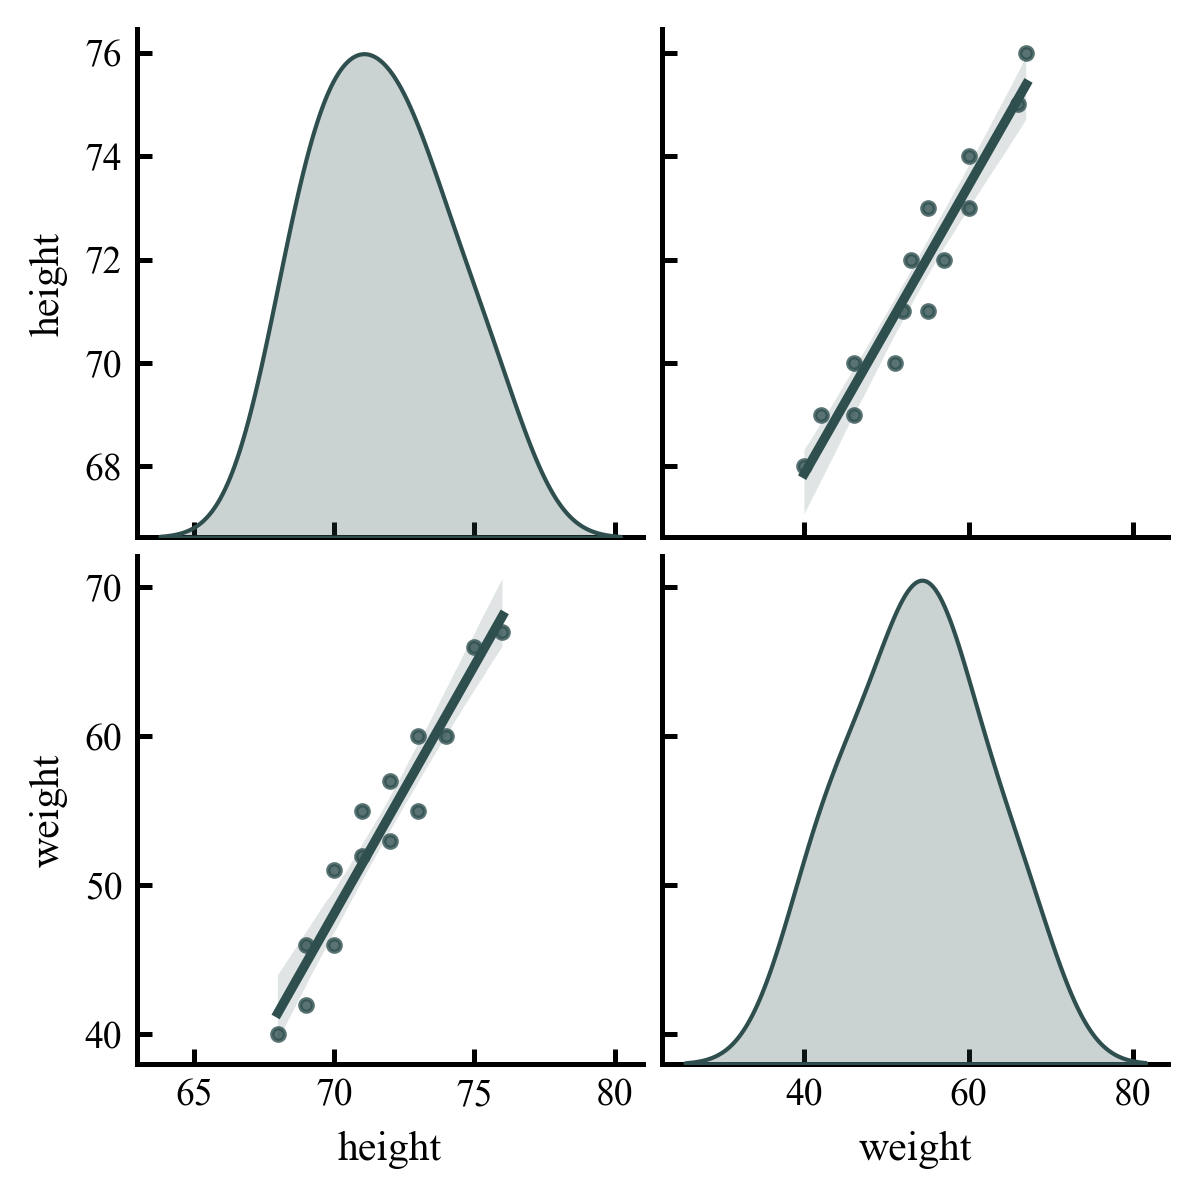

In [2]:
#NOTE: 简单相关分析
sheep = pd.read_csv('sheep.csv')
# 散点图绘制
sns.pairplot(sheep[['height','weight']],
             height=2,diag_kind='kde',markers='.',kind='reg')
plt.show()

In [3]:
# 计算相关系数
corr = sheep.iloc[:,:].corr()
# 相关系数检验
col = sheep.columns
# cor,p_value = pearsonr(sheep.loc[:,'height'],sheep.loc[:,'weight'])
df = pd.DataFrame(index=col,columns=col)
# print(col)
for i in col:
    for j in col:
        cor,p_value = pearsonr(sheep.loc[:,i],sheep.loc[:,j])
        df.loc[i,j] = round(p_value,4)
df

,height,weight
height,0.0,0.0
weight,0.0,0.0


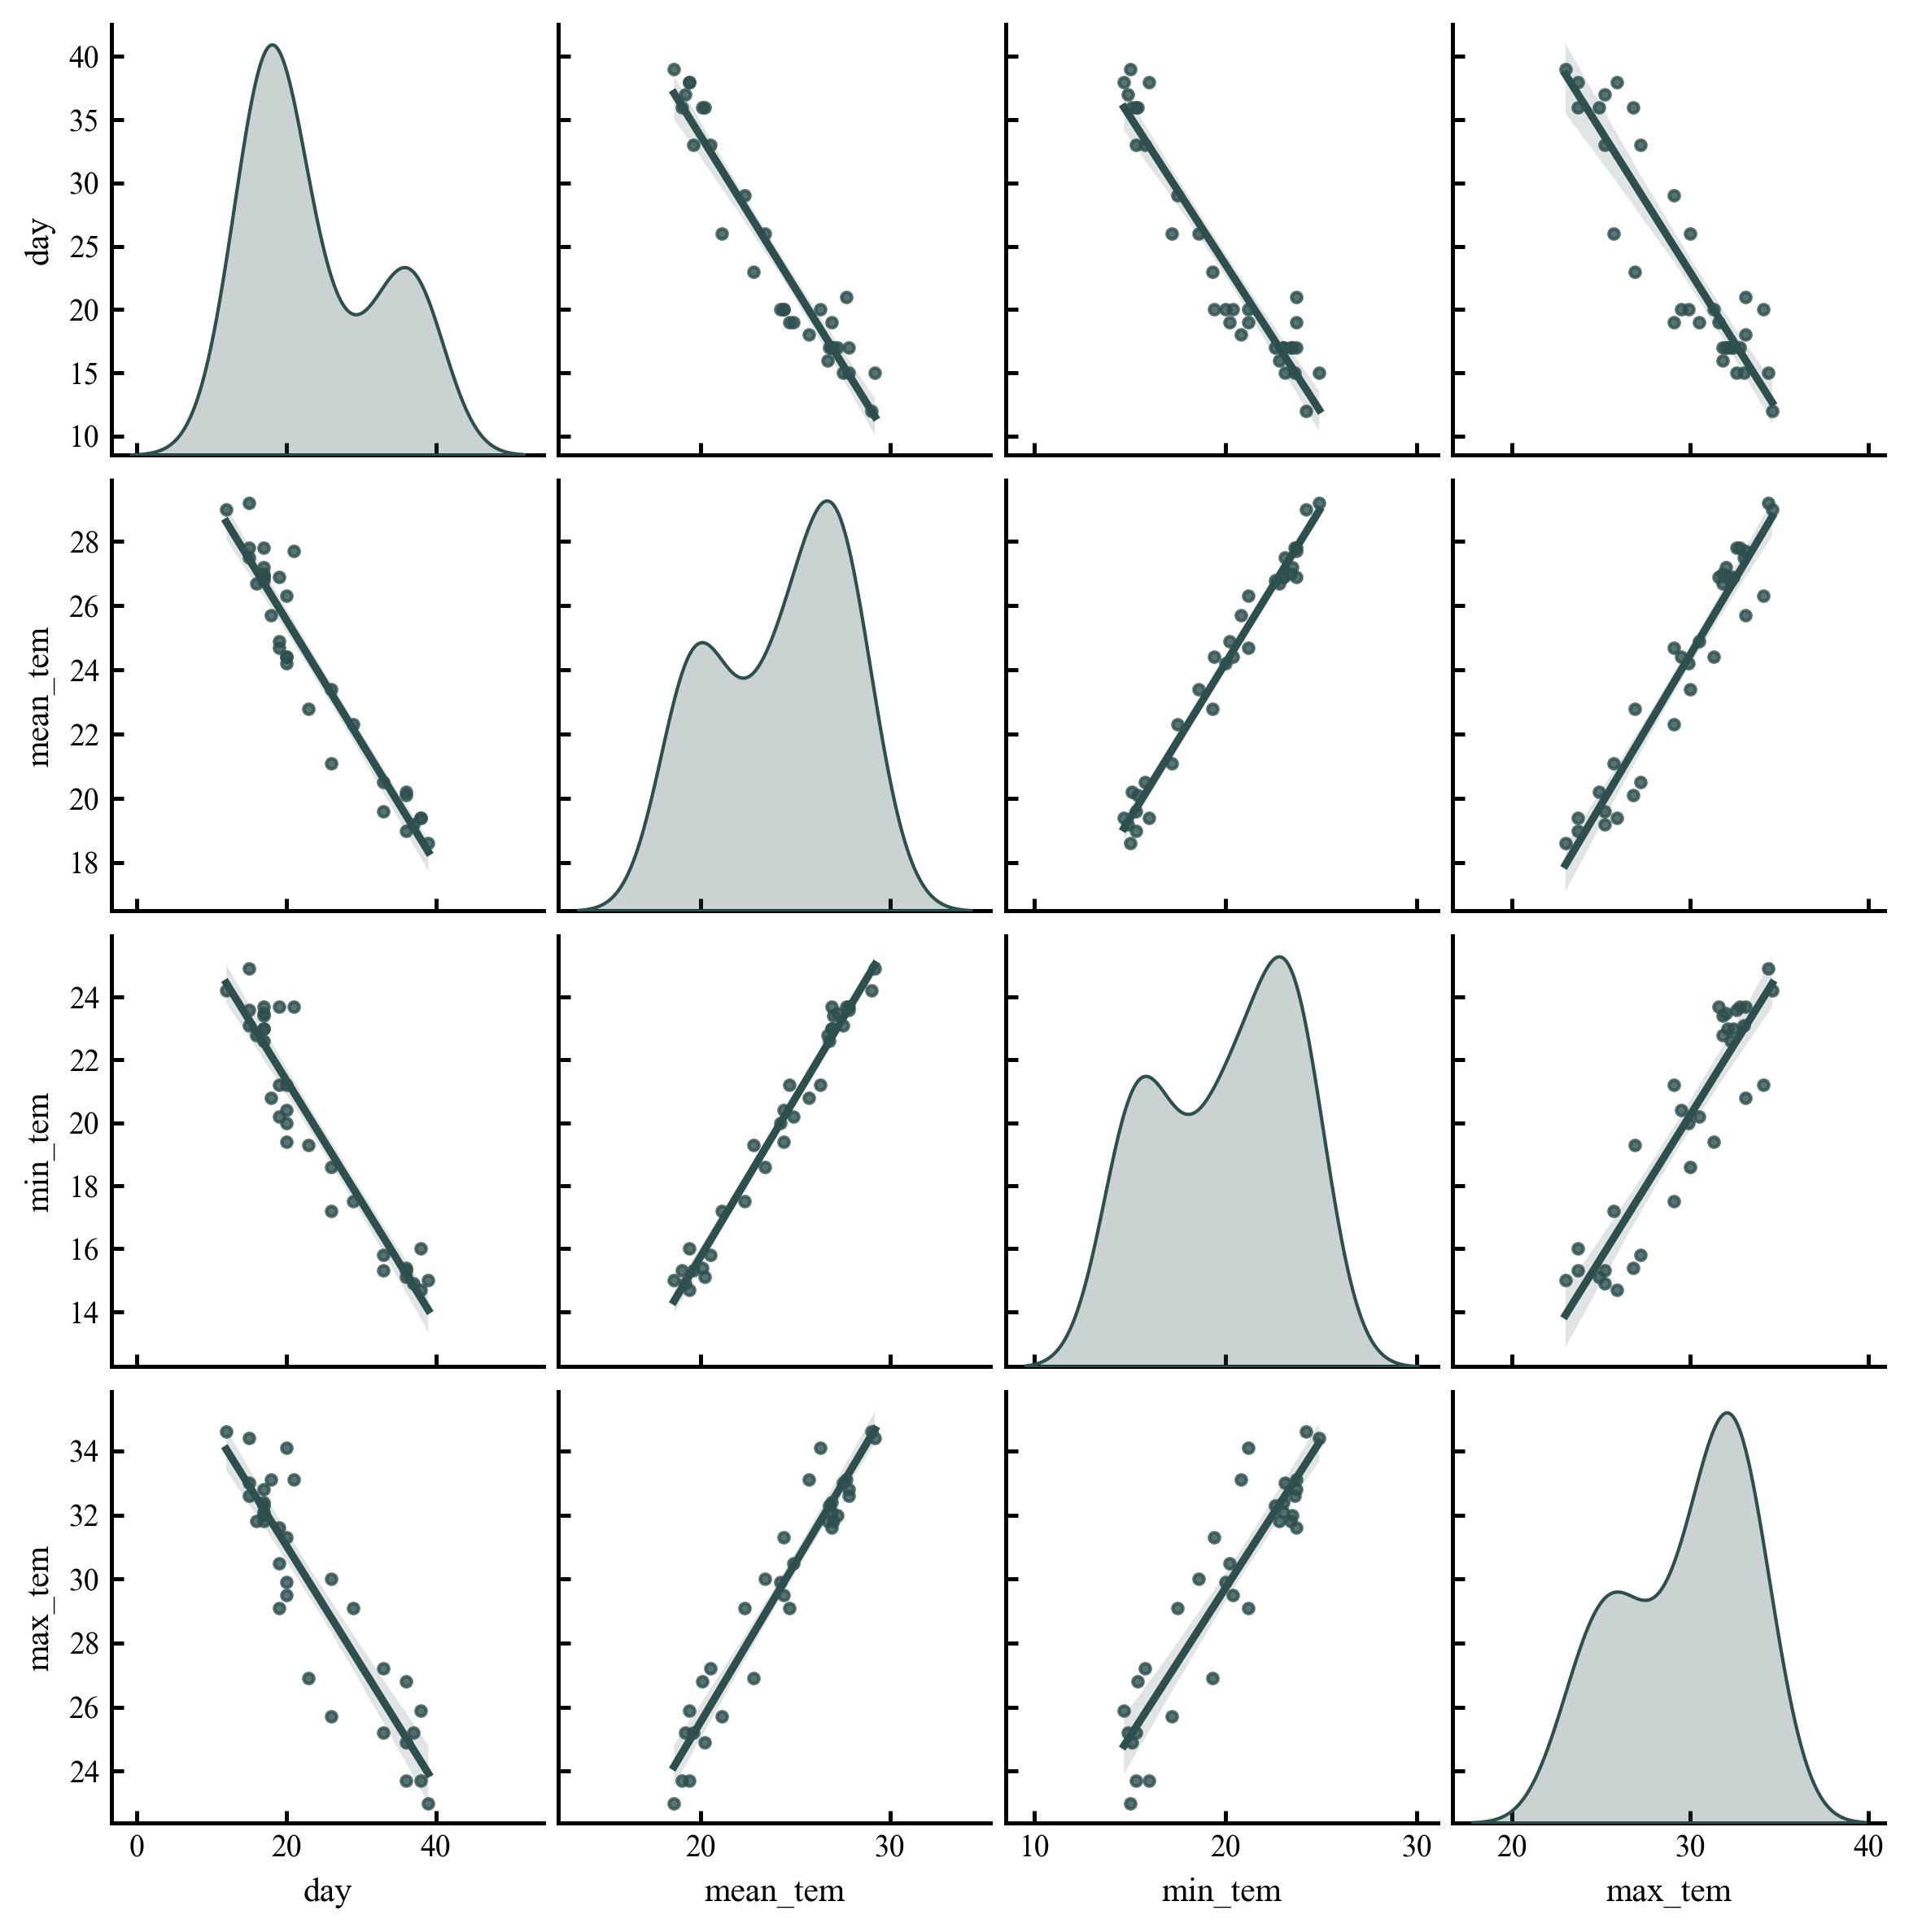

In [4]:
#NOTE: 多元相关分析
cashew = pd.read_csv('cashew.csv')
# 散点图绘制
sns.pairplot(cashew[['day','mean_tem','min_tem','max_tem']],
             height=2,diag_kind='kde',markers='.',kind='reg')
plt.show()

In [5]:
# 计算相关系数
corr = cashew.iloc[:,:].corr()
# 相关系数检验
col = cashew.columns
# cor,p_value = pearsonr(sheep.loc[:,'height'],sheep.loc[:,'weight'])
df = pd.DataFrame(index=col,columns=col)
# print(col)
for i in col:
    for j in col:
        cor,p_value = pearsonr(cashew.loc[:,i],cashew.loc[:,j])
        df.loc[i,j] = round(p_value,4)
print(corr)
print(df)

               day  mean_tem   min_tem   max_tem
day       1.000000 -0.957016 -0.948840 -0.914935
mean_tem -0.957016  1.000000  0.988013  0.962718
min_tem  -0.948840  0.988013  1.000000  0.917642
max_tem  -0.914935  0.962718  0.917642  1.000000
          day mean_tem min_tem max_tem
day       0.0      0.0     0.0     0.0
mean_tem  0.0      0.0     0.0     0.0
min_tem   0.0      0.0     0.0     0.0
max_tem   0.0      0.0     0.0     0.0


In [6]:
#NOTE: 偏相关分析
# 计算偏相关系数（控制Z）
result = pg.partial_corr(data=cashew, x='day', y='mean_tem', covar=['min_tem','max_tem'])
round(result,4)
# cashew

,n,r,CI95%,p-val
pearson,33,-0.2077,"[-0.52, 0.16]",0.2623


In [7]:
#NOTE:等级相关
lamb = pd.read_csv('lamb.csv')
# 计算斯皮尔曼相关系数及p值
corr, pvalue = spearmanr(lamb['RNA'], lamb['intake'])
print(f"斯皮尔曼系数: {corr:.5f}, p值: {pvalue:.4f}")

斯皮尔曼系数: 0.90909, p值: 0.0000
